# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
from random import sample
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from statistics import mean
# import plotly 
import matplotlib.dates as dates
import datetime
from bokeh.io import show, output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_data = pd.read_csv('../data/sat_2017.csv')
act_data = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
print(sat_data.head(10))
print(act_data.head(10))

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: One dataset displays the 2017 SAT state participation percentage rate, average 2017 SAT reading+writing scores, the average 2017 SAT math scores, and the total of the average 2017 SAT math & reading+writing scores of students in each US state.  

The other dataset displays the 2017 ACT participation percentage rate, average 2017 ACT English  scores, average 2017 ACT math scores, average 2017 ACT reading scores, average 2017 ACT science scores, and the composite (average) of the 4 2017 ACT Sections (English+math+reading+science) of students in each US state.

#### 4a. Does the data look complete? 

Answer: The data does not look complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [4]:
print(sat_data['Evidence-Based Reading and Writing'].min())
print(sat_data['Math'].min())
print(sat_data['Total'].min())

482
52
950


In [5]:
print(act_data['English'].min())
print(act_data['Math'].min())
print(act_data['Reading'].min())
print(act_data['Science'].min())
print(act_data['Composite'].min())

16.3
18.0
18.1
2.3
17.8


Answer: The obvious issues with the observations are the following:
- the lowest average 2017 SAT math score in the nation (Maryland) is way too low (in comparison to all of the other states) and this observation is reinforced by its 472 deficit from reaching its reported total score of 1060.
- the lowest average 2017 ACT science score in the nation (also Maryland) is way too low (in comparison to all of the other states) and this observation is reinforced by its 20.9 deficit from reaching its reported composite average score of 23.6.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [6]:
#code
sat_data['Math']['Maryland'] = 524
act_data['Science']['Maryland'] = 23.2

/Users/andresjimenez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/andresjimenez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
#code
print(sat_data.dtypes)
print('\n')
print(act_data.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: I learned that Participation for both SAT & ACT are set as string objects (which I believe should be set as integers since they are interpreted as whole number percentages).  I also learned that ACT Composite scores are also set as string objects (which I believe should be set as floats since they are interpreted as decimal numbers). 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [8]:
# #code

act_data['Participation'] = (act_data['Participation'].str.strip('%').astype(int))
sat_data['Participation'] = (sat_data['Participation'].str.strip('%').astype(int))

# def rate_to_numeric(rate):
#     for i in rate:
#         i = (i.str.strip('%').astype(int))
#         return rate
# rate_to_numeric(sat_data['Participation'].iloc[3]) 
# # act_data['Participation'] = act_data['Participation'].apply(pd.to_numeric)

In [9]:
print(sat_data.sort_values(by='Participation', ascending=False))
print(act_data.sort_values(by='Participation', ascending=False))

                   State  Participation  Evidence-Based Reading and Writing  \
8   District of Columbia            100                                 482   
22              Michigan            100                                 509   
6            Connecticut            100                                 530   
7               Delaware            100                                 503   
29         New Hampshire             96                                 532   
19                 Maine             95                                 513   
12                 Idaho             93                                 513   
9                Florida             83                                 520   
21         Massachusetts             76                                 555   
39          Rhode Island             71                                 539   
30            New Jersey             70                                 530   
20              Maryland             69             

- Fix any individual values preventing other columns from being the appropriate type.

In [10]:
#code

- Finish your data modifications by making sure the columns are now typed appropriately.

In [11]:
#code

- Display the data types again to confirm they are correct.

In [12]:
#Code:
print(sat_data.dtypes)
print("\n")
print(act_data.dtypes)

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [13]:
#code
sat_data = sat_data.rename(index=str, columns={'State': 'sat_state', 'Participation': 'sat_participation', 
              'Evidence-Based Reading and Writing': 'sat_read_write',  
              'Math': 'sat_math', 'Total': 'sat_total'})
act_data = act_data.rename(index=str, columns={'State': 'act_state', 'Participation': 'act_participation', 
              'English': 'act_english', 'Math': 'act_math', 'Reading': 'act_reading', 
                'Science': 'act_science', 'Composite': 'act_composite'})




#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|sat_state|object|SAT|State where 2017 SAT Tests were administered|
|sat_participation|int|SAT|2017 SAT state participation percentage rate|
|sat_read_write|int|SAT|the average 2017 SAT reading+writing scores|
|sat_math|int|SAT|the average 2017 SAT math scores|
|sat_total|int|SAT|the total of the 2017 SAT math & reading+writing scores of students in each US state|



|Feature|Type|Dataset|Description|
|---|---|---|---|
|act_state|object|ACT|State where 2017 ACT Tests were administered|
|act_participation|int|ACT|the 2017 ACT participation percentage rate|
|act_english|float|ACT|the average 2017 ACT English scores|
|act_math|float|ACT|the average 2017 ACT math scores|
|act_reading|float|ACT|the average 2017 ACT reading scores|
|act_science|float|ACT|the average 2017 ACT science scores|
|act_composite|float|ACT|the composite (average) of the 4 2017 ACT Sections (English+math+reading+science) of students in each US state|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [14]:
#code
act_data = act_data.drop(act_data.index[[0]])


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [15]:
#Code:
sat_act_merge = pd.merge(act_data, sat_data, on=act_data['act_state'], validate=None)

sat_act_merge

,key_0,act_state,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_state,sat_participation,sat_read_write,sat_math,sat_total
0,Alabama,Alabama,100,18.9,18.4,19.7,19.4,19.2,Alabama,5,593,572,1165
1,Alaska,Alaska,65,18.7,19.8,20.4,19.9,19.8,Alaska,38,547,533,1080
2,Arizona,Arizona,62,18.6,19.8,20.1,19.8,19.7,Arizona,30,563,553,1116
3,Arkansas,Arkansas,100,18.9,19.0,19.7,19.5,19.4,Arkansas,3,614,594,1208
4,California,California,31,22.5,22.7,23.1,22.2,22.8,California,53,531,524,1055
5,Colorado,Colorado,100,20.1,20.3,21.2,20.9,20.8,Colorado,11,606,595,1201
6,Connecticut,Connecticut,31,25.5,24.6,25.6,24.6,25.2,Connecticut,100,530,512,1041
7,Delaware,Delaware,18,24.1,23.4,24.8,23.6,24.1,Delaware,100,503,492,996
8,District of Columbia,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,District of Columbia,100,482,468,950
9,Florida,Florida,73,19.0,19.4,21.0,19.4,19.8,Florida,83,520,497,1017


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [16]:
#code
sat_act_merge.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [17]:
sat_data_18 = pd.read_csv('../data/sat_2018.csv')
act_data_18 = pd.read_csv('../data/act_2018.csv')
sat_act_merge_18 = pd.merge(act_data_18, sat_data_18, on=act_data_18['State'])

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [18]:
sat_act_merge_17_18 = pd.merge(sat_act_merge_18, sat_act_merge, on=sat_act_merge['act_state'], validate=None)

sat_act_merge_17_18

,key_0,key_0_x,State_x,Participation_x,Composite,State_y,Participation_y,Total,key_0_y,act_state,...,act_english,act_math,act_reading,act_science,act_composite,sat_state,sat_participation,sat_read_write,sat_math,sat_total
0,Alabama,Alabama,Alabama,100,19.1,Alabama,5,1169,Alabama,Alabama,...,18.9,18.4,19.7,19.4,19.2,Alabama,5,593,572,1165
1,Alaska,Arkansas,Arkansas,100,19.4,Alaska,33,1080,Alaska,Alaska,...,18.7,19.8,20.4,19.9,19.8,Alaska,38,547,533,1080
2,Arizona,Kentucky,Kentucky,100,20.2,Arizona,53,1116,Arizona,Arizona,...,18.6,19.8,20.1,19.8,19.7,Arizona,30,563,553,1116
3,Arkansas,Louisiana,Louisiana,100,19.2,Arkansas,94,1208,Arkansas,Arkansas,...,18.9,19.0,19.7,19.5,19.4,Arkansas,3,614,594,1208
4,California,Mississippi,Mississippi,100,18.6,California,60,1076,California,California,...,22.5,22.7,23.1,22.2,22.8,California,53,531,524,1055
5,Colorado,Missouri,Missouri,100,20.0,Colorado,100,1025,Colorado,Colorado,...,20.1,20.3,21.2,20.9,20.8,Colorado,11,606,595,1201
6,Connecticut,Montana,Montana,100,20.0,Connecticut,100,1053,Connecticut,Connecticut,...,25.5,24.6,25.6,24.6,25.2,Connecticut,100,530,512,1041
7,Delaware,Nebraska,Nebraska,100,20.1,Delaware,100,998,Delaware,Delaware,...,24.1,23.4,24.8,23.6,24.1,Delaware,100,503,492,996
8,District of Columbia,Nevada,Nevada,100,17.7,District of Columbia,92,977,District of Columbia,District of Columbia,...,24.4,23.5,24.9,23.5,24.2,District of Columbia,100,482,468,950
9,Florida,North Carolina,North Carolina,100,19.1,Florida,97,1014,Florida,Florida,...,19.0,19.4,21.0,19.4,19.8,Florida,83,520,497,1017


In [19]:
sat_act_merge_17_18.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [20]:
#Code:
sat_act_merge_17_18.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
key_0,51,51,South Carolina,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
key_0_x,51,51,South Carolina,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State_x,51,51,South Carolina,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Participation_x,51,NaN,NaN,NaN,61.6863,34.0356,7,28.5,66,100,100
Composite,51,NaN,NaN,NaN,21.498,2.11769,17.7,19.95,21.3,23.65,25.6
State_y,51,51,South Carolina,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Participation_y,51,NaN,NaN,NaN,48.6275,38.0909,2,4.5,55,81,100
Total,51,NaN,NaN,NaN,1124.33,94.5437,977,1062.5,1098,1220,1298
key_0_y,51,51,South Carolina,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
act_state,51,51,South Carolina,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [21]:
#code
#source: https://www.w3resource.com/python-exercises/math/python-math-exercise-57.php

import math
import sys

def sd_calc(data):
    # calculate stan. dev.
    for i in data:
        sd = 0
        sd += (data - mean(data))**2
        sd = math.sqrt(sd / sum(data)-1)
        
        return sd





- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [22]:
numeric_columns = sat_act_merge_17_18._get_numeric_data()
numeric_columns.columns = numeric_columns.iloc[0]
numeric_columns.head()
sd = {sd_calc for i in numeric_columns}

In [23]:
np.std(numeric_columns)
numeric_columns.describe()

,100.0,19.1,5.0,1169.0,100.0,18.9,18.4,19.7,19.4,5.0,593.0,572.0,1165.0
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.686275,21.498039,48.627451,1124.333333,65.254902,20.931373,21.182353,22.013725,21.041176,39.803922,569.117647,547.627451,1126.098039
std,34.035564,2.117686,38.090923,94.543676,32.140842,2.353677,1.981989,2.067271,3.182463,35.276632,45.666901,84.909119,92.494812
min,7.000000,17.700000,2.000000,977.000000,8.000000,16.300000,18.000000,18.100000,2.300000,2.000000,482.000000,52.000000,950.000000
25%,28.500000,19.950000,4.500000,1062.500000,31.000000,19.000000,19.400000,20.450000,19.900000,4.000000,533.500000,522.000000,1055.500000
50%,66.000000,21.300000,55.000000,1098.000000,69.000000,20.700000,20.900000,21.800000,21.300000,38.000000,559.000000,548.000000,1107.000000
75%,100.000000,23.650000,81.000000,1220.000000,100.000000,23.300000,23.100000,24.150000,22.750000,66.000000,613.000000,599.000000,1212.000000
max,100.000000,25.600000,100.000000,1298.000000,100.000000,25.500000,25.300000,26.000000,24.900000,100.000000,644.000000,651.000000,1295.000000


Do your manually calculated standard deviations match up with the output from pandas `describe`?  

My manually calculated standard deviations dont quite match up with the output from pandas

What about numpy's `std` method?

My manually calculated standard deviations dont quite match up with the output from numpy's `std` method

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [45]:
#### Investigate trends in the data
Answers
- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? 
    Highest state participation rate = District of Columbia, Michigan, Connecticut, Delaware 
    Lowest state participation rate = Iowa, Mississippi, North Dakota
    - 2018 SAT?
    Highest state participation rate = Colorado, Michigan, Connecticut, Delaware, Idaho
    Lowest state participation rate = North Dakota
    - 2017 ACT?
    Highest state participation rate =  Alabama    Kentucky   Wisconsin
    Utah   Tennessee South Carolina    Oklahoma North Carolina Nevada
    Montana Mississippi   Minnesota   Louisiana    Missouri     Wyoming
    Colorado    Arkansas
    Lowest state participation rate = Maine
    - 2018 ACT?
    Highest state participation rate = Alabama, North Carolina, Wyoming
    Wisconsin, Utah, Tennessee, Arkansas, Oklahoma, Ohio, South Carolina
    Nevada, Nebraska, Montana, Missouri, Mississippi, Louisiana, Kentucky
    Alabama, North Carolina, Wyoming, Wisconsin, Utah            
    Lowest state participation rate = Maine
    
    
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    States with Highest mean total scores = Minnesota
    States with Lowest mean total scores = District of Columbia
    - 2018 SAT?
    States with Highest mean total scores = Minnesota
    States with Lowest mean total scores = District of Columbia 
    - 2017 ACT?
    States with Highest mean composite scores = New Hampshire
    States with Lowest mean composite scores = Nevada
    - 2018 ACT?
    States with Highest mean composite scores = Connecticut 
    States with Lowest mean composite scores = Nevada
    

Do any states with 100% participation on a given test have a rate change year-to-year?
Yes.
Do any states show have >50% participation on both tests either year?
Yes.


SyntaxError: invalid syntax (<ipython-input-45-7cb60d243b48>, line 3)

In [46]:
#code

#the highest and lowest participation rates for the 2017 SAT
print(sat_data.sort_values(by='sat_participation', ascending=False).head(20))
print(sat_data.sort_values(by='sat_participation', ascending=True).head(20))

               sat_state  sat_participation  sat_read_write  sat_math  \
8   District of Columbia                100             482       468   
22              Michigan                100             509       495   
6            Connecticut                100             530       512   
7               Delaware                100             503       492   
29         New Hampshire                 96             532       520   
19                 Maine                 95             513       499   
12                 Idaho                 93             513       493   
9                Florida                 83             520       497   
21         Massachusetts                 76             555       551   
39          Rhode Island                 71             539       524   
30            New Jersey                 70             530       526   
20              Maryland                 69             536        52   
32              New York                 67        

In [47]:
#the highest and lowest participation rates for the 2018 SAT
print(sat_data_18.sort_values(by='Participation', ascending=False).head(20))
print(sat_data_18.sort_values(by='Participation', ascending=True).head(20))



                   State  Participation  Total
5               Colorado            100   1025
6            Connecticut            100   1053
7               Delaware            100    998
22              Michigan            100   1011
12                 Idaho            100   1001
19                 Maine             99   1013
13              Illinois             99   1019
39          Rhode Island             97   1018
9                Florida             97   1014
29         New Hampshire             96   1063
3               Arkansas             94   1208
8   District of Columbia             92    977
30            New Jersey             82   1094
21         Massachusetts             80   1125
32              New York             79   1068
20              Maryland             76   1080
38          Pennsylvania             70   1086
10               Georgia             70   1064
47            Washington             69   1081
46              Virginia             68   1117
           St

In [48]:
#the highest and lowest participation rates for the 2017 ACT
print(act_data.sort_values(by='act_participation', ascending=False).head(20))
print(act_data.sort_values(by='act_participation', ascending=True).head(20))



         act_state  act_participation  act_english  act_math  act_reading  \
1          Alabama                100         18.9      18.4         19.7   
18        Kentucky                100         19.6      19.4         20.5   
50       Wisconsin                100         19.7      20.4         20.6   
45            Utah                100         19.5      19.9         20.8   
43       Tennessee                100         19.5      19.2         20.1   
41  South Carolina                100         17.5      18.6         19.1   
37        Oklahoma                100         18.5      18.8         20.1   
34  North Carolina                100         17.8      19.3         19.6   
29          Nevada                100         16.3      18.0         18.1   
27         Montana                100         19.0      20.2         21.0   
25     Mississippi                100         18.2      18.1         18.8   
24       Minnesota                100         20.4      21.5         21.8   

In [49]:
#the highest and lowest participation rates for the 2018 ACT
print(act_data_18.sort_values(by='Participation', ascending=False).head(20))
print(act_data_18.sort_values(by='Participation', ascending=True).head(20))



             State  Participation  Composite
0          Alabama            100       19.1
9   North Carolina            100       19.1
16         Wyoming            100       20.0
15       Wisconsin            100       20.5
14            Utah            100       20.4
13       Tennessee            100       19.6
1         Arkansas            100       19.4
11        Oklahoma            100       19.3
10            Ohio            100       20.3
12  South Carolina            100       18.3
8           Nevada            100       17.7
7         Nebraska            100       20.1
6          Montana            100       20.0
5         Missouri            100       20.0
4      Mississippi            100       18.6
3        Louisiana            100       19.2
2         Kentucky            100       20.2
17       Minnesota             99       21.3
18    North Dakota             98       20.3
19          Hawaii             89       18.9
                   State  Participation  Composite
50  

In [50]:
#The highest and lowest mean total/composite scores for the 2017 SAT
print(sat_data.sort_values(by='sat_total', ascending=False).head(20))
print(sat_data.sort_values(by='sat_total', ascending=True).head(20))



       sat_state  sat_participation  sat_read_write  sat_math  sat_total
23     Minnesota                  3             644       651       1295
49     Wisconsin                  3             642       649       1291
15          Iowa                  2             641       635       1275
25      Missouri                  3             640       631       1271
16        Kansas                  4             632       628       1260
34  North Dakota                  2             635       621       1256
27      Nebraska                  3             629       625       1253
17      Kentucky                  4             631       616       1247
24   Mississippi                  2             634       607       1242
44          Utah                  3             624       614       1238
50       Wyoming                  3             626       604       1230
42     Tennessee                  5             623       604       1228
41  South Dakota                  3             612

In [51]:
#The highest and lowest mean total/composite scores for the 2018 SAT
print(sat_data_18.sort_values(by='Total', ascending=False).head(20))
print(sat_data_18.sort_values(by='Total', ascending=True).head(20))


            State  Participation  Total
23      Minnesota              4   1298
49      Wisconsin              3   1294
34   North Dakota              2   1283
15           Iowa              3   1265
16         Kansas              4   1265
25       Missouri              4   1262
50        Wyoming              3   1257
27       Nebraska              3   1252
17       Kentucky              4   1248
41   South Dakota              3   1241
24    Mississippi              3   1236
42      Tennessee              6   1231
44           Utah              4   1230
18      Louisiana              4   1210
3        Arkansas             94   1208
26        Montana             10   1198
0         Alabama              5   1169
28         Nevada             23   1140
21  Massachusetts             80   1125
45        Vermont             64   1120
                   State  Participation  Total
8   District of Columbia             92    977
7               Delaware            100    998
48         West Vir

In [52]:
#The highest and lowest mean total/composite scores for the 2017 ACT
print(act_data.sort_values(by='act_composite', ascending=False).head(20))
print(act_data.sort_values(by='act_composite', ascending=True).head(20))



               act_state  act_participation  act_english  act_math  \
30         New Hampshire                 18         25.4      25.1   
22         Massachusetts                 29         25.4      25.3   
7            Connecticut                 31         25.5      24.6   
20                 Maine                  8         24.2      24.0   
9   District of Columbia                 32         24.4      23.5   
33              New York                 31         23.8      24.0   
23              Michigan                 29         24.1      23.7   
8               Delaware                 18         24.1      23.4   
40          Rhode Island                 21         24.0      23.3   
31            New Jersey                 34         23.8      23.8   
47              Virginia                 29         23.5      23.3   
39          Pennsylvania                 23         23.4      23.4   
21              Maryland                 28         23.3      23.1   
46               Ver

In [53]:
#The highest and lowest mean total/composite scores for the 2018 ACT
print(act_data_18.sort_values(by='Composite', ascending=False).head(20))
print(act_data_18.sort_values(by='Composite', ascending=True).head(20))

                   State  Participation  Composite
40           Connecticut             26       25.6
41         Massachusetts             25       25.5
48         New Hampshire             16       25.1
39              New York             27       24.5
45              Michigan             24       24.4
49          Rhode Island             15       24.2
42               Vermont             24       24.1
50                 Maine              7       24.0
37              Colorado             30       23.9
43              Virginia             24       23.9
28              Illinois             43       23.9
47              Delaware             17       23.8
36            New Jersey             31       23.7
33  District of Columbia             32       23.6
46          Pennsylvania             20       23.5
38            California             27       22.7
34               Indiana             32       22.5
35              Maryland             31       22.5
31                 Idaho       

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

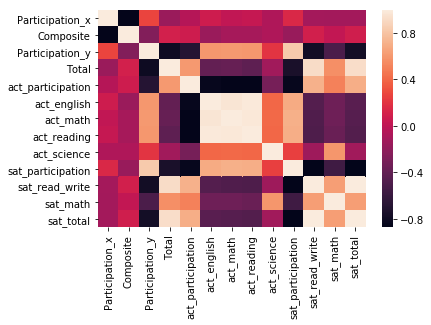

In [58]:
sns.heatmap(sat_act_merge_17_18.corr())

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [55]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

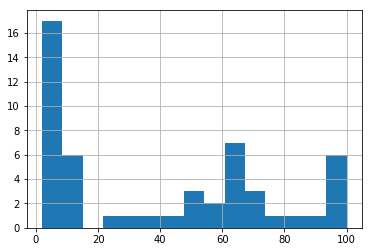

In [69]:
# Code
sat_data['sat_participation'].hist(bins=15)







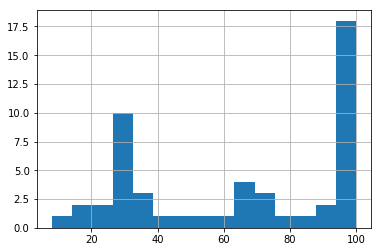

In [70]:
act_data['act_participation'].hist(bins=15)


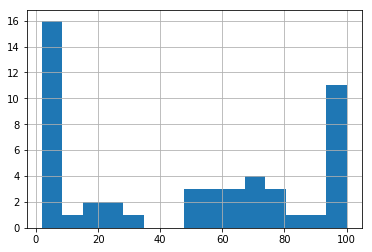

In [71]:
sat_data_18['Participation'].hist(bins=15)


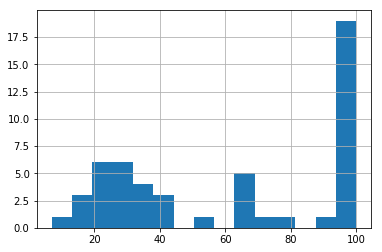

In [72]:
act_data_18['Participation'].hist(bins=15)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [79]:
sat_data.head()

,sat_state,sat_participation,sat_read_write,sat_math,sat_total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


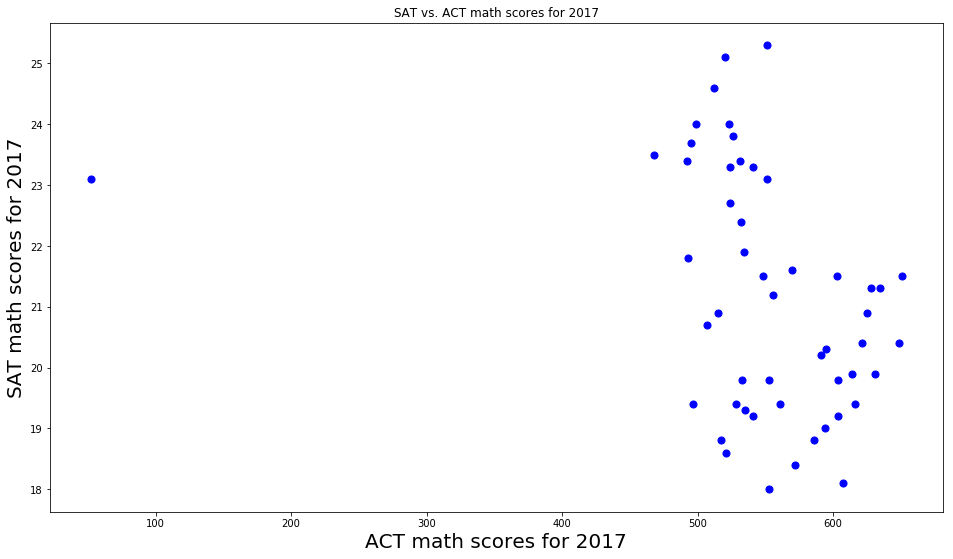

In [85]:
# Code
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of high prices versus volume.
plt.scatter(sat_data['sat_math'],
           act_data['act_math'],
           color = 'blue',
           s = 50, #size of the solid circle dots in the scatter plot
           alpha = 0.999) #opacity of the solid circle dots in the scatter plot

plt.title("SAT vs. ACT math scores for 2017")
plt.ylabel("SAT math scores for 2017", fontsize = 20)
plt.xlabel("ACT math scores for 2017", fontsize = 20);


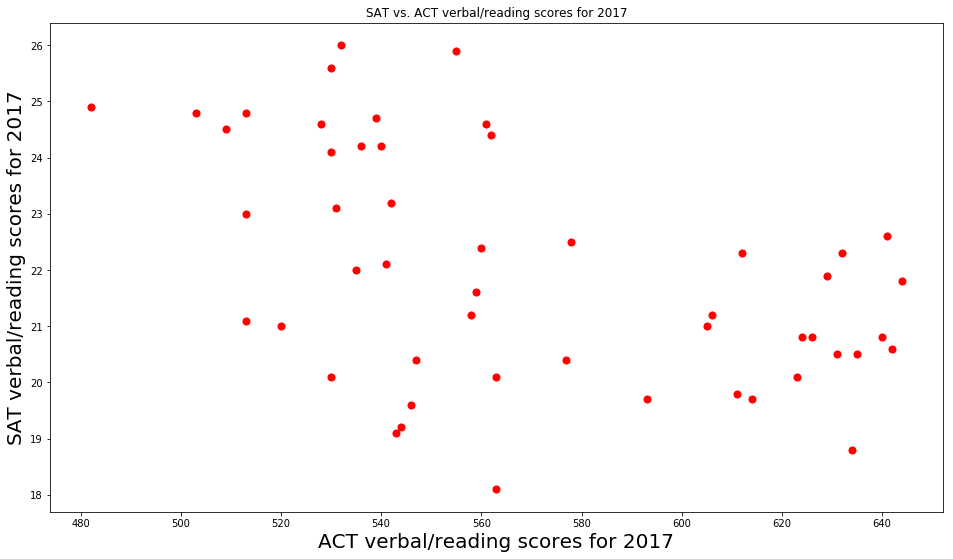

In [87]:
# Code
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of high prices versus volume.
plt.scatter(sat_data['sat_read_write'],
           act_data['act_reading'],
           color = 'red',
           s = 50, #size of the solid circle dots in the scatter plot
           alpha = 0.999) #opacity of the solid circle dots in the scatter plot

plt.title("SAT vs. ACT verbal/reading scores for 2017")
plt.ylabel("SAT verbal/reading scores for 2017", fontsize = 20)
plt.xlabel("ACT verbal/reading scores for 2017", fontsize = 20);



#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

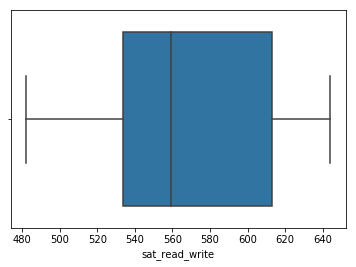

In [101]:
# Code
ax = sns.boxplot(x=sat_data['sat_read_write'])

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

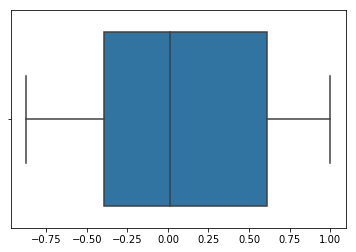

In [102]:
ax = sns.boxplot(x=sat_act_merge_17_18.corr())

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

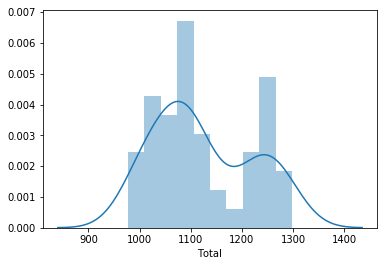

In [109]:
sns.distplot(sat_data_18['Total'],
             bins=10, 
             kde = True);

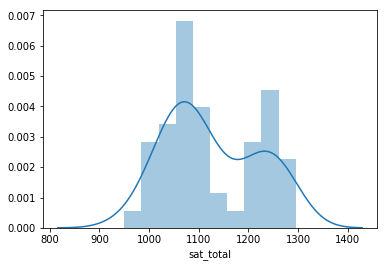

In [110]:
sns.distplot(sat_data['sat_total'],
             bins=10, 
             kde = True);

Answer: For the variables in our data a relatively normal distribution is observed.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

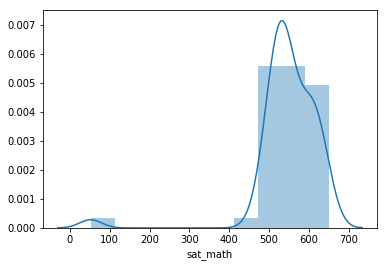

In [113]:
sns.distplot(sat_data['sat_math'],
             bins=10, 
             kde = True);

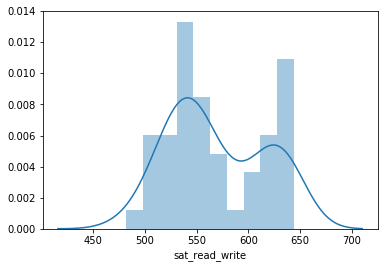

In [114]:
sns.distplot(sat_data['sat_read_write'],
             bins=10, 
             kde = True);

Answer: Math scews to the left while Reading is a relatively normal distribution.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: I don't believe it does make sense to conduct statistical inference given this data because the numbers reported may not actually jive with actual participation rate and the proportions make be off for smaller states.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:  It's likely not appropriate to compare specific SAT and ACT math scores because the some states make ACT mandatory while other states make SAT mandatory.  This mandatory setting likely has a negative impact on the scores student earn because they didn't actively seek to test.  These negative scores jumbled in together with the different content specifics of both math exams make it inappropriate to compare the specific tests.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Nevada, DC, South Dakota are interesting because they show trends of both low partipation and performance.  

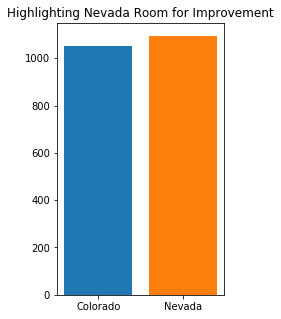

In [100]:
# Set size of figure: eight by five.
plt.figure(figsize=(3, 5))

# Create a bar chart.
# plt.bar() will create a vertical bar chart.
plt.bar(['Colorado',], # X Labels
       [sat_data_18.iloc[6]['Total']]) #Y Labels

plt.bar(['Nevada'], # X Labels
       [sat_data_18.iloc[30]['Total']]) #Y Labels


# Add a title and show the plot.
plt.title('Highlighting Nevada Room for Improvement');

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

I would recommend to the Collegeboard that we invest in Nevada because its: 
    a low participation state and much more populated than low performing DC (therefore there's plenty of room for company growth if we invest in Nevada more)